In [1]:
# Import all necessary libraries.
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

In [14]:
# Load the digits dataset.
digits = load_digits()
target_names = digits.target_names
print(target_names)

[0 1 2 3 4 5 6 7 8 9]


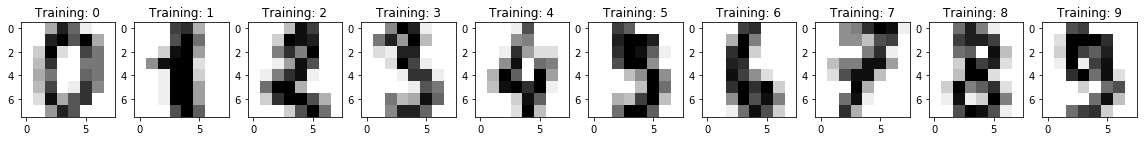

In [4]:
# Plot some digits from the data-set.
plt.figure(figsize=(20, 5))
for i in range(0,10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % digits.target[i])
plt.show()

In [5]:
# To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [32]:
# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True)

In [33]:
# Create classifier.
clf = DecisionTreeClassifier(criterion='gini')

# Fit the classifier on the training features and labels.
clf.fit(x_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred = clf.predict(x_test)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y_test, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.8527777777777777


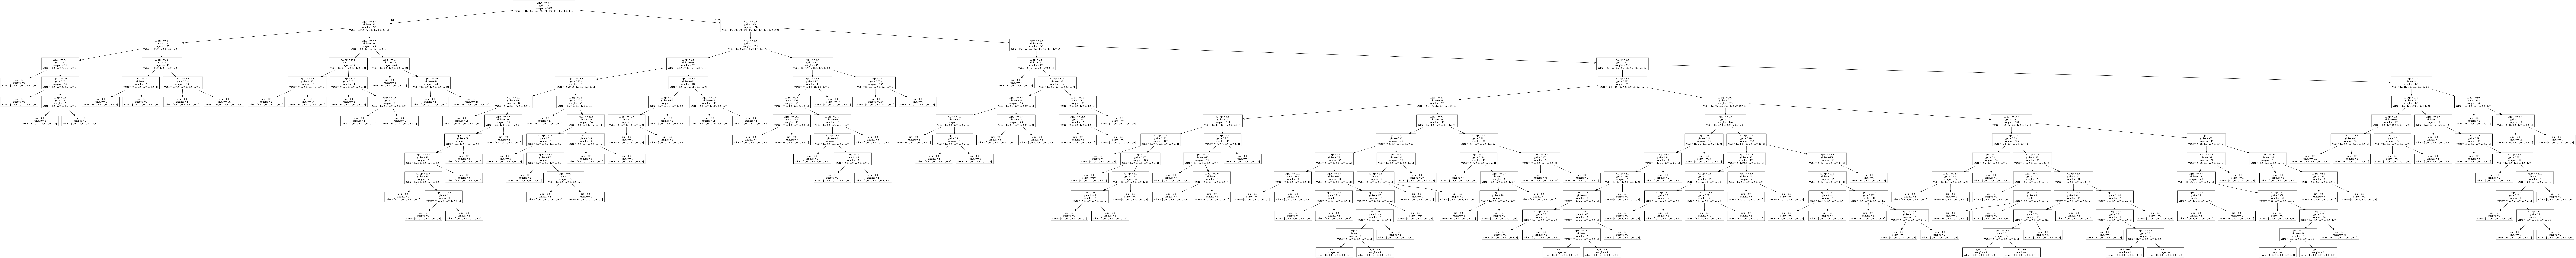

In [34]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

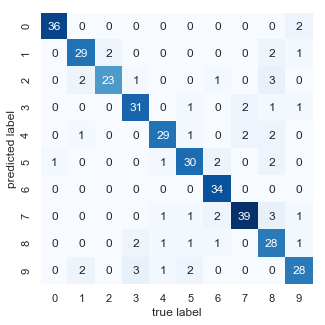

In [35]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=target_names, yticklabels=target_names, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix_bc.png', dpi=600)
plt.show()

In [29]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.73      0.92      0.81        38
           2       0.93      0.78      0.85        32
           3       0.76      0.66      0.70        38
           4       0.92      0.85      0.89        41
           5       0.89      0.86      0.88        37
           6       0.94      0.91      0.92        33
           7       0.95      0.97      0.96        38
           8       0.74      0.61      0.67        28
           9       0.68      0.84      0.75        38

   micro avg       0.84      0.84      0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360

